<a href="https://colab.research.google.com/github/keethu12345/Tracing_PFAS_Source_Using_ML/blob/main/PFAS_Source_Classification_PCA_Langberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initially install all the required libraries.

In [1]:
# libraries
!pip install matplotlib
!pip install --upgrade seaborn
from matplotlib.axis import XAxis
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, RobustScaler
from sklearn import datasets
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib import colors
import os

saveDir = os.getcwd()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [2]:
def confidence_ellipse_matplot(x, y, ax, n_std=1.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [3]:
from google.colab import files

uploaded = files.upload()

Saving Input.xlsx to Input.xlsx
Saving LangbergData.xlsx to LangbergData.xlsx
Saving MLInput.xlsx to MLInput.xlsx


In [4]:
lDf = pd. read_excel('LangbergData.xlsx')
lDf.columns = lDf.iloc[0]
cols = lDf.columns.to_list()
lDf = lDf.drop(0, axis = 0)
lDf = lDf.drop(lDf.columns[[0,1,4,5,7,9,10]], axis=1)
lDf = lDf.fillna(0)
# NOTE: add line here to pair downt the chemical list
lDf = lDf[['PFAS source', 'Lake/stream','Species','Tissue','PFNA', 'PFDA', 'PFUnDA', 'PFDoDA', 'PFTrDA', 'PFTeDA', 'PFPeDA', 'L-PFOS', 'PFDS', 'FOSA']]
lDf.head()

,PFAS source,Lake/stream,Species,Tissue,PFNA,PFDA,PFUnDA,PFDoDA,PFTrDA,PFTeDA,PFPeDA,L-PFOS,PFDS,FOSA
1,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,"<0,500","<0,500","<0,500","<0,500","<0,500","<0,500",0,2.47,"<0,750","<0,500"
2,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,"<0,500","<0,500","<0,500","<0,500","<0,500","<0,500",0,2.23,"<0,750","<0,500"
3,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,"<0,500","<0,500",1.48,"<0,500","<0,500","<0,500",0,17.6,"<0,750","<0,500"
4,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,"<0,500","<0,500","<0,500","<0,500","<0,500","<0,500",0,0.737,"<0,750","<0,500"
5,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,"<0,500","<0,500",0.679,"<0,500","<0,500","<0,500",0,11.4,"<0,750","<0,500"


In [5]:
# Delete all columns which do not have 0 values for entire DF
print(len(lDf.columns))
lDf = lDf.replace(to_replace='<', value=0, regex=True)
print(len(lDf.columns))

lDf.loc[lDf['Species'] == 'Brown trout', 'Species'] = 'Brown Trout'
# # Now select the AFFF data and only the muscle
# AFFF = lDf[lDf['PFAS source'] == 'AFFF']
# AFFF = AFFF[AFFF['Tissue'] == 'Muscle']
# AFFF = AFFF.loc[:, (AFFF != 0).any(axis=0)]
lDf.head()

14
14


,PFAS source,Lake/stream,Species,Tissue,PFNA,PFDA,PFUnDA,PFDoDA,PFTrDA,PFTeDA,PFPeDA,L-PFOS,PFDS,FOSA
1,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,0.0,0.0,0.000,0.0,0.0,0.0,0.0,2.470,0.0,0.0
2,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,0.0,0.0,0.000,0.0,0.0,0.0,0.0,2.230,0.0,0.0
3,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,0.0,0.0,1.480,0.0,0.0,0.0,0.0,17.600,0.0,0.0
4,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.737,0.0,0.0
5,AFFF,Evenes-Lavangsvatnet,Brown Trout,Muscle,0.0,0.0,0.679,0.0,0.0,0.0,0.0,11.400,0.0,0.0


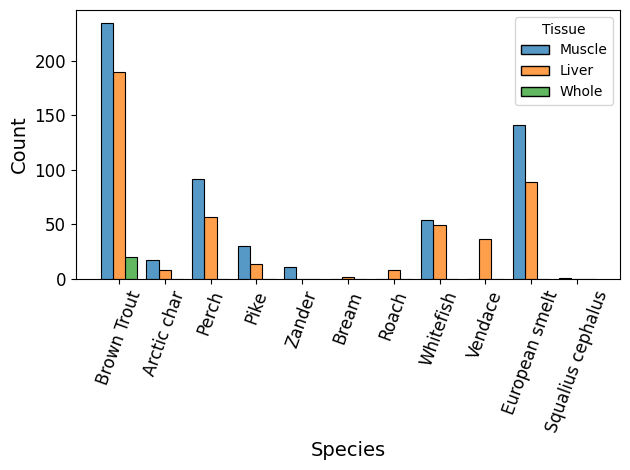

In [6]:
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
fig, ax = plt.subplots(1,1)
sns.histplot(data=lDf, x="Species", hue="Tissue", multiple="dodge", shrink=.8, ax=ax)
ax.tick_params('x', labelrotation = 70, labelsize=12)
ax.tick_params('y', labelsize = 12)
ax.set_xlabel('Species', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
# ax.set_ylim(0,10)
plt.tight_layout()
plt.savefig('images\\speciesCount.png', dpi=200, bbox_inches='tight')

In [7]:
plt.close()

In [8]:
plt.close()
X = lDf[lDf.columns.to_list()[4:len(lDf.columns)]].to_numpy()
for i in list(range(len(X[:,0]))):
    X[i,:] = X[i,:]/np.sum(X[i,:])
X[(np.isinf(X)) | (np.isnan(X))] = 0
pd.DataFrame(X).to_excel('..\\MassFractionData.xlsx')
lDf['PFAS source'] = pd.Categorical(lDf['PFAS source'])
lDf['Categories'] = lDf['PFAS source'].cat.codes
y = lDf['Categories'].to_numpy()
catList = list(lDf['Categories'].drop_duplicates())
names = list(lDf['PFAS source'].drop_duplicates())

# In general, it's a good idea to scale the data prior to PCA.
scaler = MaxAbsScaler()
scaler.fit(X)
eX=scaler.transform(X)
#
pca = PCA(n_components=4)
x_new = pca.fit_transform(eX)
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(eX), columns=['PCA%i' % i for i in range(4)], index=lDf.index)
result['Source'] = list(lDf['PFAS source'])
result['Tissue'] = list(lDf['Tissue'])
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())

<ipython-input-8-0b94f3d4d967>:4: RuntimeWarning: invalid value encountered in divide
  X[i,:] = X[i,:]/np.sum(X[i,:])


[0.59277676 0.17623013 0.08910484 0.04289281] 0.9010045491659422


In [9]:
scaler = MaxAbsScaler()
scaler.fit(X)
eX=scaler.transform(X)
pd.DataFrame(eX).to_excel('..\\ScaledMassFractionData.xlsx')
#
pca = PCA(n_components=4)
x_new = pca.fit_transform(eX)
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(eX), columns=['PCA%i' % i for i in range(1,5,1)], index=lDf.index)
result['Source'] = list(lDf['PFAS source'])
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())

pca = PCA(n_components=2)
components = pca.fit_transform(eX)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(len(loadings))
final = lDf.columns.to_list()[4:len(lDf.columns)-1]

components = pd.DataFrame(components, columns=["PC-1", "PC-2"])
components["Source"] = lDf['PFAS source'].str.strip()
components["Tissue"] = lDf['Tissue'].str.strip()
components = components[~components['Source'].isna()]

[0.59277676 0.17623013 0.08910484 0.04289281] 0.9010045491659423
10


In [10]:
leftovers = []
for i, feature in enumerate(final):

    if (loadings[i,0] > -0.1) & (loadings[i,0] < 0.3) & (loadings[i,1] > -0.05) & (loadings[i,1] < 0.1):
        leftovers.extend([feature])
print(len(leftovers))

7


In [11]:
xlocs = [-0.005, 0.04, 0.10]
ylocs = []
for i in list(range(12)):
    value = 0.075 - (i * 0.0125)
    ylocs.extend([value])
print(len(xlocs), len(ylocs))

3 12


<ipython-input-19-fa5d5964a5b3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


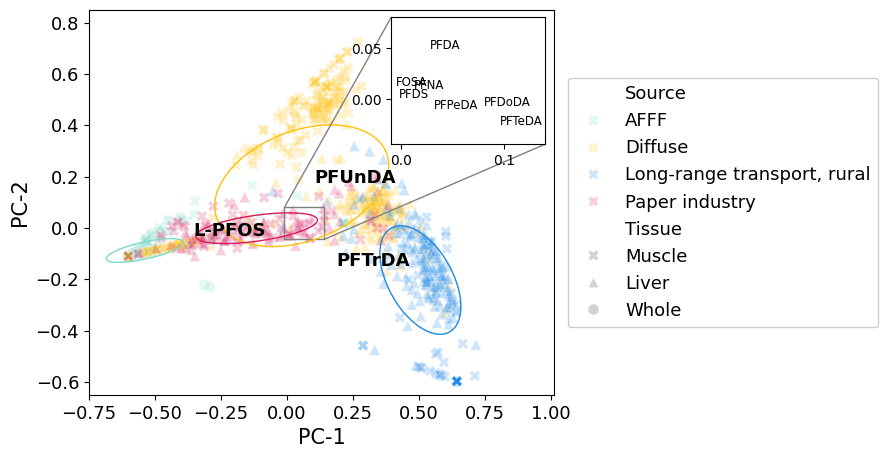

In [19]:
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
plt.close()
fig, ax1 = plt.subplots(figsize= (6,5))
plt.style.use('seaborn-bright')
plt.rcParams["font.family"] = "DejaVu Sans"

cL = ['#7CDACA', '#FFC107', '#1E88E5', '#D81B60']
components =components.sort_values(by=['Source'])
# The data.
sns.scatterplot(data=components, x='PC-1', y = 'PC-2', hue='Source', style='Tissue', ax = ax1, s = 60, alpha= 0.21,
                palette=cL, markers=['X','^','o'])
# The Einstein fit.
ax1.set_xlabel(r'PC-1', fontsize = 15)
ax1.set_ylabel(r'PC-2', fontsize = 15)
ax1.set_xlim(-0.75, 1.01)
ax1.set_ylim(-.65, 0.85)
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), framealpha = 1, frameon = True, fontsize = 13)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.65,0.65,0.33,0.33])
ax2.set_axes_locator(ip)
ax2.set_xlim(-0.01, 0.14)
ax2.set_ylim(-0.045, 0.08)
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
counterX = 0
counterY = 0
for i, feature in enumerate(final):
    if loadings[i,1] < 0:
        yloc = "top"
    else:
        yloc = "bottom"

    if (loadings[i,0] > -0.1) & (loadings[i,0] < 0.3) & (loadings[i,1] > -0.05) & (loadings[i,1] < 0.1):
        ax2.text(
            # --- Organized by other --- #
            # x=xlocs[counterX],
            # y=ylocs[counterY],
            # -- Orgainzed by actual location ---#
            x=loadings[i, 0],
            y=loadings[i, 1],

            s = feature,
            fontsize = 8.5
            )
        counterY = counterY + 1
        if counterY > 11:
            counterX = counterX + 1
            counterY = 0
    else:
        ax1.text(
            x=loadings[i, 0],
            y=loadings[i, 1],
            s = feature,
            fontsize = 13,
            fontweight = 'bold',
            horizontalalignment = 'left'
            )

for s, c  in zip(list(components['Source'].drop_duplicates()), cL):
    dummy = components[components['Source'] == s]
    if len(dummy['PC-1']) > 2:
        x = np.array(dummy['PC-1'])
        why = np.array(dummy['PC-2'])

        confidence_ellipse_matplot(x, why, ax1, edgecolor=c)

ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
# ax2.tick_params(axis="both", labelbottom=False, labelleft = False)

plt.savefig('images\\FractionPCA_inset_ellipse_downselected.png', bbox_inches = 'tight', dpi =400)
plt.show()

PCA on fish species for subgroups.

In [21]:
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
lDf = pd. read_excel('LangbergData.xlsx')
lDf.columns = lDf.iloc[0]
cols = lDf.columns.to_list()
lDf = lDf.drop(0, axis = 0)
lDf = lDf.drop(lDf.columns[[0,1,4,5,7,9,10]], axis=1)
lDf = lDf.fillna(0)
lDf.loc[lDf['Species'] == 'Brown trout', 'Species'] = 'Brown Trout'

# NOTE: add line here to pair downt the chemical list
lDf.head()

# Delete all columns which do not have 0 values for entire DF
lDf = lDf.replace(to_replace='<', value=0, regex=True)
# Now select the AFFF data and only the muscle
AFFF = lDf[lDf['PFAS source'] == 'AFFF']
AFFF = AFFF[AFFF['Tissue'] == 'Muscle']

X = AFFF[AFFF.columns.to_list()[4:len(AFFF.columns)]].to_numpy()
for i in list(range(len(X[:,0]))):
    X[i,:] = X[i,:]/np.sum(X[i,:])
X[(np.isinf(X)) | (np.isnan(X))] = 0
AFFF['PFAS source'] = pd.Categorical(AFFF['PFAS source'])
AFFF['Categories'] = AFFF['PFAS source'].cat.codes
y = AFFF['Categories'].to_numpy()
catList = list(AFFF['Categories'].drop_duplicates())
names = list(AFFF['PFAS source'].drop_duplicates())

scaler = MaxAbsScaler()
scaler.fit(X)
eX=scaler.transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(eX)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())
final = AFFF.columns.to_list()[4:len(AFFF.columns)-1]
print(len(loadings), len(final))
print(final)
components = pd.DataFrame(components, columns=["PC-1", "PC-2"])
components["Source"] = lDf['PFAS source'].str.strip()
components["Species"] = lDf['Species'].str.strip()
components = components[~components['Source'].isna()]

[0.28396851 0.1711423 ] 0.4551108131686582
38 38
['PFBA', 'PFPA', 'PFHxA', 'PFHpA', 'PFOA', 'PFNA', 'PFDA', 'PFUnDA', 'PFDoDA', 'PFTrDA', 'PFTeDA', 'PFPeDA', 'PFHxDA', 'PFBS', 'PFPeS', 'PFHxS', 'PFHpS', 'L-PFOS', 'Br-PFOS', 'PFNS', 'PFDS', 'PFDoS', 'FOSA', 'Me-PFOSA', 'Et-PFOSA', 'Me-PFOSE', 'Et-PFOSE', 'FOSAA', 'Me-FOSAA', 'Et-FOSAA', '4:2 FTS', '6:2 FTS', '8:2 FTS', '10:2 FTS', '12:2 FTS', '14:2 FTS', 'PF-3,7-DMOA', 'HPFHpA']


<ipython-input-21-499e2e950fdf>:22: RuntimeWarning: invalid value encountered in divide
  X[i,:] = X[i,:]/np.sum(X[i,:])


<ipython-input-25-de7c99b39212>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


#f77189
#ce9032
#97a431
#32b166
#36ada4
#39a7d0
#a48cf4
#f561dd


<ipython-input-2-6e85d97930f1>:30: RuntimeWarning: invalid value encountered in sqrt
  ell_radius_x = np.sqrt(1 + pearson)


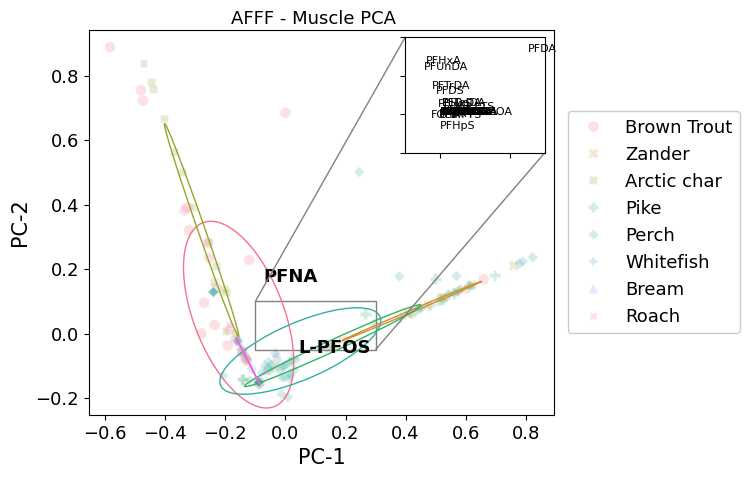

In [25]:
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
plt.close()
fig, ax1 = plt.subplots(figsize= (6,5))
plt.style.use('seaborn-bright')
plt.rcParams["font.family"] = "DejaVu Sans"

cL = sns.color_palette("husl", len(components['Species'].drop_duplicates()))
cL2 = cL.as_hex()
components =components.sort_values(by=['Source'])
# The data.
sns.scatterplot(data=components, x='PC-1', y = 'PC-2', hue='Species', style='Species', ax = ax1, s = 60, alpha= 0.21, )
# The Einstein fit.
ax1.set_xlabel(r'PC-1', fontsize = 15)
ax1.set_ylabel(r'PC-2', fontsize = 15)
# ax1.set_xlim(-0.75, 1.01)
# ax1.set_ylim(-.65, 0.85)
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), framealpha = 1, frameon = True, fontsize = 13)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.68,0.68,0.3,0.3])
ax2.set_axes_locator(ip)
ax2.set_ylim(-0.05, 0.1)
ax2.set_xlim(-0.1, 0.3)
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
counterX = 0
counterY = 0
for i, feature in enumerate(final):
    if loadings[i,1] < 0:
        yloc = "top"
    else:
        yloc = "bottom"

    if (loadings[i,0] > -0.1) & (loadings[i,0] < 0.3) & (loadings[i,1] > -0.05) & (loadings[i,1] < 0.1):
        ax2.text(
            # --- Organized by other --- #
            # x=xlocs[counterX],
            # y=ylocs[counterY],
            # -- Orgainzed by actual location ---#
            x=loadings[i, 0],
            y=loadings[i, 1],

            s = feature,
            fontsize = 8
            )
        counterY = counterY + 1
        # if counterY > 11:
        #     counterX = counterX + 1
        #     counterY = 0
    else:
        ax1.text(
            x=loadings[i, 0],
            y=loadings[i, 1],
            s = feature,
            fontsize = 13,
            fontweight = 'bold',
            horizontalalignment = 'left'
            )

for s, c  in zip(list(components['Species'].drop_duplicates()), cL2):
    print(c)
    dummy = components[components['Species'] == s]
    if len(dummy['PC-1']) > 6:
        x = np.array(dummy['PC-1'])
        why = np.array(dummy['PC-2'])
        try:
            confidence_ellipse_matplot(x, why, ax1, edgecolor=c)
        except:
            pass

ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="both", labelbottom=False, labelleft = False)

plt.suptitle("AFFF - Muscle PCA", x = 0.5, y = 0.92, fontsize = 13)
plt.savefig('images\\FractionPCA_speciesAFFF_mus.png', bbox_inches = 'tight', dpi =400)
plt.show()


AFFF in Liver

In [26]:
lDf = pd. read_excel('LangbergData.xlsx')
lDf.columns = lDf.iloc[0]
cols = lDf.columns.to_list()
lDf = lDf.drop(0, axis = 0)
lDf = lDf.drop(lDf.columns[[0,1,4,5,7,9,10]], axis=1)
lDf = lDf.fillna(0)
lDf.loc[lDf['Species'] == 'Brown trout', 'Species'] = 'Brown Trout'

# NOTE: add line here to pair downt the chemical list
lDf.head()

# Delete all columns which do not have 0 values for entire DF
lDf = lDf.replace(to_replace='<', value=0, regex=True)
# Now select the AFFF data and only the muscle
AFFF = lDf[lDf['PFAS source'] == 'AFFF']
AFFF = AFFF[AFFF['Tissue'] == 'Liver']
AFFF = AFFF.loc[:, (AFFF != 0).any(axis=0)]

X = AFFF[AFFF.columns.to_list()[4:len(AFFF.columns)]].to_numpy()
for i in list(range(len(X[:,0]))):
    X[i,:] = X[i,:]/np.sum(X[i,:])
X[(np.isinf(X)) | (np.isnan(X))] = 0
AFFF['PFAS source'] = pd.Categorical(AFFF['PFAS source'])
AFFF['Categories'] = AFFF['PFAS source'].cat.codes
y = AFFF['Categories'].to_numpy()
catList = list(AFFF['Categories'].drop_duplicates())
names = list(AFFF['PFAS source'].drop_duplicates())

scaler = MaxAbsScaler()
scaler.fit(X)
eX=scaler.transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(eX)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())
final = AFFF.columns.to_list()[4:len(AFFF.columns)-1]
print(len(loadings), len(final))
print(final)
components = pd.DataFrame(components, columns=["PC-1", "PC-2"])
components["Source"] = lDf['PFAS source'].str.strip()
components["Species"] = lDf['Species'].str.strip()
components = components[~components['Source'].isna()]

[0.37047683 0.25004153] 0.6205183560503629
17 17
['PFHpA', 'PFOA', 'PFNA', 'PFDA', 'PFUnDA', 'PFDoDA', 'PFTrDA', 'PFTeDA', 'PFHxS', 'PFHpS', 'L-PFOS', 'PFNS', 'PFDS', 'PFDoS', 'FOSA', '6:2 FTS', '8:2 FTS']


<ipython-input-27-6395ba0e36bc>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


#f77189
#36ada4


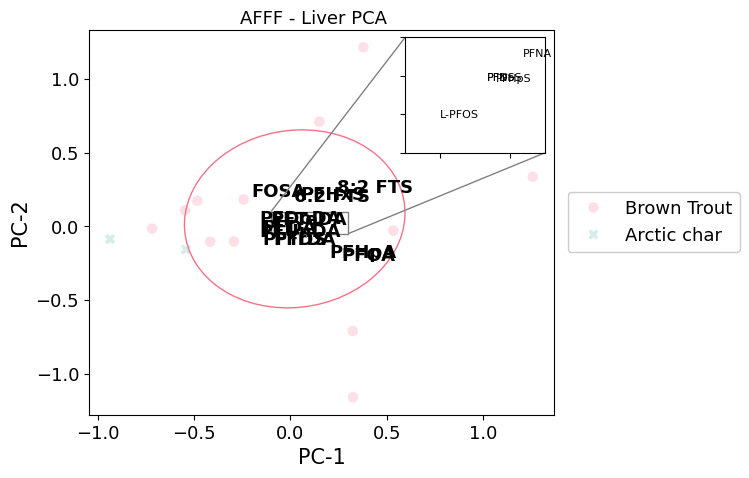

In [27]:
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
plt.close()
fig, ax1 = plt.subplots(figsize= (6,5))
plt.style.use('seaborn-bright')
plt.rcParams["font.family"] = "DejaVu Sans"

cL = sns.color_palette("husl", len(components['Species'].drop_duplicates()))
cL2 = cL.as_hex()
components =components.sort_values(by=['Source'])
# The data.
sns.scatterplot(data=components, x='PC-1', y = 'PC-2', hue='Species', style='Species', ax = ax1, s = 60, alpha= 0.21, palette=cL)
# The Einstein fit.
ax1.set_xlabel(r'PC-1', fontsize = 15)
ax1.set_ylabel(r'PC-2', fontsize = 15)
# ax1.set_xlim(-0.75, 1.01)
# ax1.set_ylim(-.65, 0.85)
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), framealpha = 1, frameon = True, fontsize = 13)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.68,0.68,0.3,0.3])
ax2.set_axes_locator(ip)
ax2.set_ylim(-0.05, 0.1)
ax2.set_xlim(-0.1, 0.3)
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
counterX = 0
counterY = 0
for i, feature in enumerate(final):
    if loadings[i,1] < 0:
        yloc = "top"
    else:
        yloc = "bottom"

    if (loadings[i,0] > -0.1) & (loadings[i,0] < 0.3) & (loadings[i,1] > -0.05) & (loadings[i,1] < 0.1):
        ax2.text(
            # --- Organized by other --- #
            # x=xlocs[counterX],
            # y=ylocs[counterY],
            # -- Orgainzed by actual location ---#
            x=loadings[i, 0],
            y=loadings[i, 1],

            s = feature,
            fontsize = 8
            )
        counterY = counterY + 1
        # if counterY > 11:
        #     counterX = counterX + 1
        #     counterY = 0
    else:
        ax1.text(
            x=loadings[i, 0],
            y=loadings[i, 1],
            s = feature,
            fontsize = 13,
            fontweight = 'bold',
            horizontalalignment = 'left'
            )

for s, c  in zip(list(components['Species'].drop_duplicates()), cL2):
    print(c)
    dummy = components[components['Species'] == s]
    if len(dummy['PC-1']) > 2:
        x = np.array(dummy['PC-1'])
        why = np.array(dummy['PC-2'])
        try:
            confidence_ellipse_matplot(x, why, ax1, edgecolor=c)
        except:
            pass

ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="both", labelbottom=False, labelleft = False)

plt.suptitle("AFFF - Liver PCA", x = 0.5, y = 0.92, fontsize = 13)
plt.savefig('images\\FractionPCA_speciesAFFF_liv.png', bbox_inches = 'tight', dpi =400)
plt.show()

Diffuse Muscle.

In [28]:
lDf = pd. read_excel('LangbergData.xlsx')
lDf.columns = lDf.iloc[0]
cols = lDf.columns.to_list()
lDf = lDf.drop(0, axis = 0)
lDf = lDf.drop(lDf.columns[[0,1,4,5,7,9,10]], axis=1)
lDf = lDf.fillna(0)
lDf.loc[lDf['Species'] == 'Brown trout', 'Species'] = 'Brown Trout'

# NOTE: add line here to pair downt the chemical list
lDf.head()

# Delete all columns which do not have 0 values for entire DF
lDf = lDf.replace(to_replace='<', value=0, regex=True)
# Now select the AFFF data and only the muscle
AFFF = lDf[lDf['PFAS source'] == 'Diffuse']
AFFF = AFFF[AFFF['Tissue'] == 'Muscle']

X = AFFF[AFFF.columns.to_list()[4:len(AFFF.columns)]].to_numpy()
for i in list(range(len(X[:,0]))):
    X[i,:] = X[i,:]/np.sum(X[i,:])
X[(np.isinf(X)) | (np.isnan(X))] = 0
AFFF['PFAS source'] = pd.Categorical(AFFF['PFAS source'])
AFFF['Categories'] = AFFF['PFAS source'].cat.codes
y = AFFF['Categories'].to_numpy()
catList = list(AFFF['Categories'].drop_duplicates())
names = list(AFFF['PFAS source'].drop_duplicates())

scaler = MaxAbsScaler()
scaler.fit(X)
eX=scaler.transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(eX)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())
final = AFFF.columns.to_list()[4:len(AFFF.columns)-1]
print(len(loadings), len(final))
print(final)
components = pd.DataFrame(components, columns=["PC-1", "PC-2"])
components["Source"] = lDf['PFAS source'].str.strip()
components["Species"] = lDf['Species'].str.strip()
components = components[~components['Source'].isna()]

[0.56463022 0.14841429] 0.7130445082434091
38 38
['PFBA', 'PFPA', 'PFHxA', 'PFHpA', 'PFOA', 'PFNA', 'PFDA', 'PFUnDA', 'PFDoDA', 'PFTrDA', 'PFTeDA', 'PFPeDA', 'PFHxDA', 'PFBS', 'PFPeS', 'PFHxS', 'PFHpS', 'L-PFOS', 'Br-PFOS', 'PFNS', 'PFDS', 'PFDoS', 'FOSA', 'Me-PFOSA', 'Et-PFOSA', 'Me-PFOSE', 'Et-PFOSE', 'FOSAA', 'Me-FOSAA', 'Et-FOSAA', '4:2 FTS', '6:2 FTS', '8:2 FTS', '10:2 FTS', '12:2 FTS', '14:2 FTS', 'PF-3,7-DMOA', 'HPFHpA']


<ipython-input-29-6b2fed619dd7>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


#f77189
#ce9032
#97a431
#32b166
#36ada4
#39a7d0
#a48cf4
#f561dd


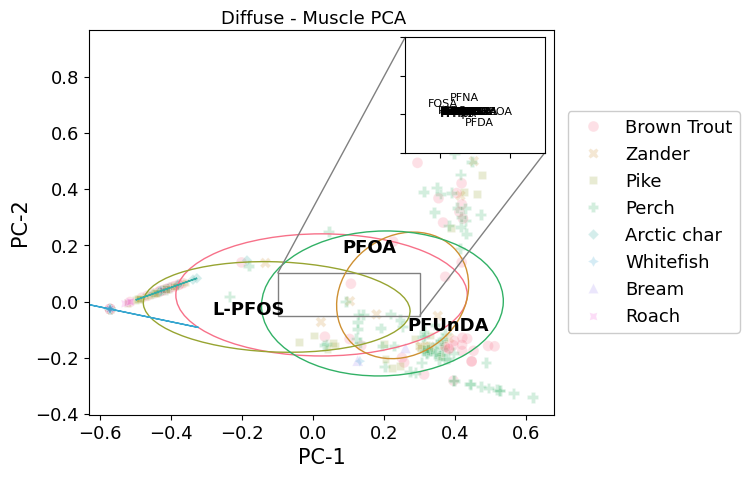

In [29]:
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
plt.close()
fig, ax1 = plt.subplots(figsize= (6,5))
plt.style.use('seaborn-bright')
plt.rcParams["font.family"] = "DejaVu Sans"

cL = sns.color_palette("husl", len(components['Species'].drop_duplicates()))
cL2 = cL.as_hex()
components =components.sort_values(by=['Source'])
# The data.
sns.scatterplot(data=components, x='PC-1', y = 'PC-2', hue='Species', style='Species', ax = ax1, s = 60, alpha= 0.21, palette=cL)
# The Einstein fit.
ax1.set_xlabel(r'PC-1', fontsize = 15)
ax1.set_ylabel(r'PC-2', fontsize = 15)
# ax1.set_xlim(-0.75, 1.01)
# ax1.set_ylim(-.65, 0.85)
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), framealpha = 1, frameon = True, fontsize = 13)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.68,0.68,0.3,0.3])
ax2.set_axes_locator(ip)
ax2.set_ylim(-0.05, 0.1)
ax2.set_xlim(-0.1, 0.3)
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
counterX = 0
counterY = 0
for i, feature in enumerate(final):
    if loadings[i,1] < 0:
        yloc = "top"
    else:
        yloc = "bottom"

    if (loadings[i,0] > -0.1) & (loadings[i,0] < 0.3) & (loadings[i,1] > -0.05) & (loadings[i,1] < 0.1):
        ax2.text(
            # --- Organized by other --- #
            # x=xlocs[counterX],
            # y=ylocs[counterY],
            # -- Orgainzed by actual location ---#
            x=loadings[i, 0],
            y=loadings[i, 1],

            s = feature,
            fontsize = 8
            )
        counterY = counterY + 1
        # if counterY > 11:
        #     counterX = counterX + 1
        #     counterY = 0
    else:
        ax1.text(
            x=loadings[i, 0],
            y=loadings[i, 1],
            s = feature,
            fontsize = 13,
            fontweight = 'bold',
            horizontalalignment = 'left'
            )

for s, c  in zip(list(components['Species'].drop_duplicates()), cL2):
    print(c)
    dummy = components[components['Species'] == s]
    if len(dummy['PC-1']) > 8:
        x = np.array(dummy['PC-1'])
        why = np.array(dummy['PC-2'])
        try:
            confidence_ellipse_matplot(x, why, ax1, edgecolor=c)
        except:
            pass

ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="both", labelbottom=False, labelleft = False)

plt.suptitle("Diffuse - Muscle PCA", x = 0.5, y = 0.92, fontsize = 13)
plt.savefig('images\\FractionPCA_speciesDiff_mus.png', bbox_inches = 'tight', dpi =400)
plt.show()

Diffuse Liver PCA.

In [30]:
lDf = pd. read_excel('LangbergData.xlsx')
lDf.columns = lDf.iloc[0]
cols = lDf.columns.to_list()
lDf = lDf.drop(0, axis = 0)
lDf = lDf.drop(lDf.columns[[0,1,4,5,7,9,10]], axis=1)
lDf = lDf.fillna(0)
lDf.loc[lDf['Species'] == 'Brown trout', 'Species'] = 'Brown Trout'

# NOTE: add line here to pair downt the chemical list
lDf.head()

# Delete all columns which do not have 0 values for entire DF
lDf = lDf.replace(to_replace='<', value=0, regex=True)
# Now select the AFFF data and only the muscle
AFFF = lDf[lDf['PFAS source'] == 'Diffuse']
AFFF = AFFF[AFFF['Tissue'] == 'Liver']

X = AFFF[AFFF.columns.to_list()[4:len(AFFF.columns)]].to_numpy()
for i in list(range(len(X[:,0]))):
    X[i,:] = X[i,:]/np.sum(X[i,:])
X[(np.isinf(X)) | (np.isnan(X))] = 0
AFFF['PFAS source'] = pd.Categorical(AFFF['PFAS source'])
AFFF['Categories'] = AFFF['PFAS source'].cat.codes
y = AFFF['Categories'].to_numpy()
catList = list(AFFF['Categories'].drop_duplicates())
names = list(AFFF['PFAS source'].drop_duplicates())

scaler = MaxAbsScaler()
scaler.fit(X)
eX=scaler.transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(eX)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())
final = AFFF.columns.to_list()[4:len(AFFF.columns)-1]
print(len(loadings), len(final))
print(final)
components = pd.DataFrame(components, columns=["PC-1", "PC-2"])
components["Source"] = lDf['PFAS source'].str.strip()
components["Species"] = lDf['Species'].str.strip()
components = components[~components['Source'].isna()]

[0.22582869 0.14235633] 0.36818502231101946
38 38
['PFBA', 'PFPA', 'PFHxA', 'PFHpA', 'PFOA', 'PFNA', 'PFDA', 'PFUnDA', 'PFDoDA', 'PFTrDA', 'PFTeDA', 'PFPeDA', 'PFHxDA', 'PFBS', 'PFPeS', 'PFHxS', 'PFHpS', 'L-PFOS', 'Br-PFOS', 'PFNS', 'PFDS', 'PFDoS', 'FOSA', 'Me-PFOSA', 'Et-PFOSA', 'Me-PFOSE', 'Et-PFOSE', 'FOSAA', 'Me-FOSAA', 'Et-FOSAA', '4:2 FTS', '6:2 FTS', '8:2 FTS', '10:2 FTS', '12:2 FTS', '14:2 FTS', 'PF-3,7-DMOA', 'HPFHpA']


<ipython-input-31-35f1dc56081c>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


#f77189
#ce9032
#97a431
#32b166
#36ada4
#39a7d0
#a48cf4
#f561dd


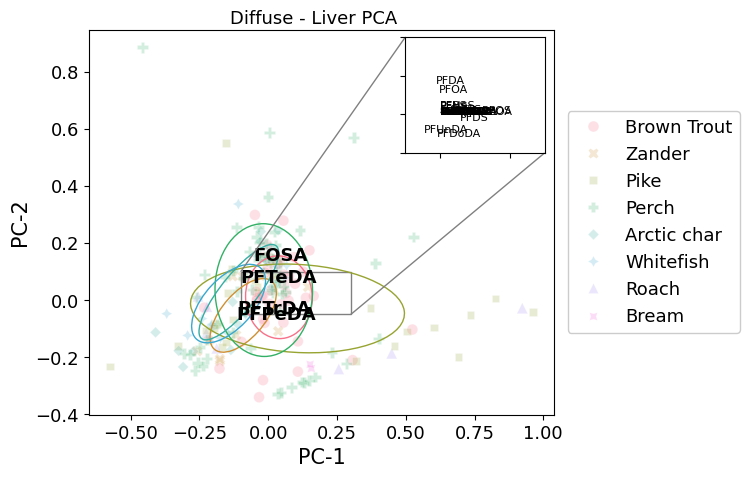

In [31]:
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
plt.close()
fig, ax1 = plt.subplots(figsize= (6,5))
plt.style.use('seaborn-bright')
plt.rcParams["font.family"] = "DejaVu Sans"

cL = sns.color_palette("husl", len(components['Species'].drop_duplicates()))
cL2 = cL.as_hex()
components =components.sort_values(by=['Source'])
# The data.
sns.scatterplot(data=components, x='PC-1', y = 'PC-2', hue='Species', style='Species', ax = ax1, s = 60, alpha= 0.21, palette=cL)
# The Einstein fit.
ax1.set_xlabel(r'PC-1', fontsize = 15)
ax1.set_ylabel(r'PC-2', fontsize = 15)
# ax1.set_xlim(-0.75, 1.01)
# ax1.set_ylim(-.65, 0.85)
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), framealpha = 1, frameon = True, fontsize = 13)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.68,0.68,0.3,0.3])
ax2.set_axes_locator(ip)
ax2.set_ylim(-0.05, 0.1)
ax2.set_xlim(-0.1, 0.3)
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
counterX = 0
counterY = 0
for i, feature in enumerate(final):
    if loadings[i,1] < 0:
        yloc = "top"
    else:
        yloc = "bottom"

    if (loadings[i,0] > -0.1) & (loadings[i,0] < 0.3) & (loadings[i,1] > -0.05) & (loadings[i,1] < 0.1):
        ax2.text(
            # --- Organized by other --- #
            # x=xlocs[counterX],
            # y=ylocs[counterY],
            # -- Orgainzed by actual location ---#
            x=loadings[i, 0],
            y=loadings[i, 1],

            s = feature,
            fontsize = 8
            )
        counterY = counterY + 1
        # if counterY > 11:
        #     counterX = counterX + 1
        #     counterY = 0
    else:
        ax1.text(
            x=loadings[i, 0],
            y=loadings[i, 1],
            s = feature,
            fontsize = 13,
            fontweight = 'bold',
            horizontalalignment = 'left'
            )

for s, c  in zip(list(components['Species'].drop_duplicates()), cL2):
    print(c)
    dummy = components[components['Species'] == s]
    if len(dummy['PC-1']) > 8:
        x = np.array(dummy['PC-1'])
        why = np.array(dummy['PC-2'])
        try:
            confidence_ellipse_matplot(x, why, ax1, edgecolor=c)
        except:
            pass

ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="both", labelbottom=False, labelleft = False)

plt.suptitle("Diffuse - Liver PCA", x = 0.5, y = 0.92, fontsize = 13)
plt.savefig('images\\FractionPCA_speciesDiff_liv.png', bbox_inches = 'tight', dpi =400)
plt.show()

Paper industry muscle.

In [32]:
lDf = pd. read_excel('LangbergData.xlsx')
lDf.columns = lDf.iloc[0]
cols = lDf.columns.to_list()
lDf = lDf.drop(0, axis = 0)
lDf = lDf.drop(lDf.columns[[0,1,4,5,7,9,10]], axis=1)
lDf = lDf.fillna(0)
lDf.loc[lDf['Species'] == 'Brown trout', 'Species'] = 'Brown Trout'

# NOTE: add line here to pair downt the chemical list
lDf.head()

# Delete all columns which do not have 0 values for entire DF
lDf = lDf.replace(to_replace='<', value=0, regex=True)
# Now select the AFFF data and only the muscle
AFFF = lDf[lDf['PFAS source'] == 'Paper industry']
AFFF = AFFF[AFFF['Tissue'] == 'Muscle']

X = AFFF[AFFF.columns.to_list()[4:len(AFFF.columns)]].to_numpy()
for i in list(range(len(X[:,0]))):
    X[i,:] = X[i,:]/np.sum(X[i,:])
X[(np.isinf(X)) | (np.isnan(X))] = 0
AFFF['PFAS source'] = pd.Categorical(AFFF['PFAS source'])
AFFF['Categories'] = AFFF['PFAS source'].cat.codes
y = AFFF['Categories'].to_numpy()
catList = list(AFFF['Categories'].drop_duplicates())
names = list(AFFF['PFAS source'].drop_duplicates())

scaler = MaxAbsScaler()
scaler.fit(X)
eX=scaler.transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(eX)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())
final = AFFF.columns.to_list()[4:len(AFFF.columns)-1]
print(len(loadings), len(final))
print(final)
components = pd.DataFrame(components, columns=["PC-1", "PC-2"])
components["Source"] = lDf['PFAS source'].str.strip()
components["Species"] = lDf['Species'].str.strip()
components = components[~components['Source'].isna()]

[0.35175145 0.1513303 ] 0.503081754365509
38 38
['PFBA', 'PFPA', 'PFHxA', 'PFHpA', 'PFOA', 'PFNA', 'PFDA', 'PFUnDA', 'PFDoDA', 'PFTrDA', 'PFTeDA', 'PFPeDA', 'PFHxDA', 'PFBS', 'PFPeS', 'PFHxS', 'PFHpS', 'L-PFOS', 'Br-PFOS', 'PFNS', 'PFDS', 'PFDoS', 'FOSA', 'Me-PFOSA', 'Et-PFOSA', 'Me-PFOSE', 'Et-PFOSE', 'FOSAA', 'Me-FOSAA', 'Et-FOSAA', '4:2 FTS', '6:2 FTS', '8:2 FTS', '10:2 FTS', '12:2 FTS', '14:2 FTS', 'PF-3,7-DMOA', 'HPFHpA']


<ipython-input-33-ca904fcaf44f>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


#f77189
#ae9d31
#33b07a
#38a9c5
#cc7af4


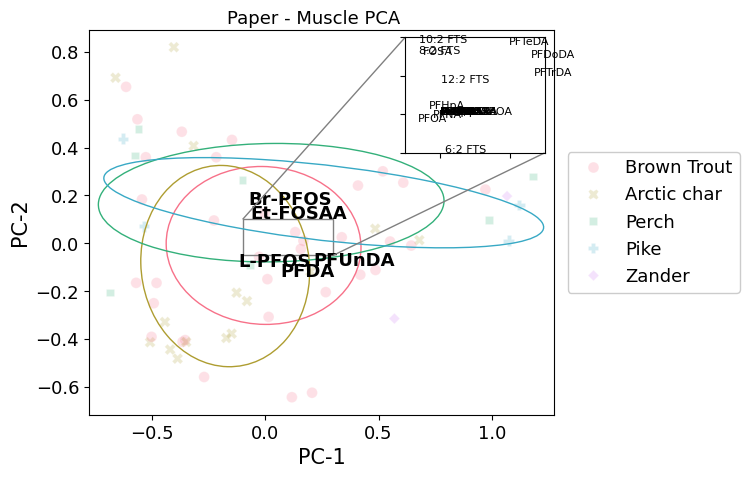

In [33]:
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
plt.close()
fig, ax1 = plt.subplots(figsize= (6,5))
plt.style.use('seaborn-bright')
plt.rcParams["font.family"] = "DejaVu Sans"

cL = sns.color_palette("husl", len(components['Species'].drop_duplicates()))
cL2 = cL.as_hex()
components =components.sort_values(by=['Source'])
# The data.
sns.scatterplot(data=components, x='PC-1', y = 'PC-2', hue='Species', style='Species', ax = ax1, s = 60, alpha= 0.21, palette=cL)
# The Einstein fit.
ax1.set_xlabel(r'PC-1', fontsize = 15)
ax1.set_ylabel(r'PC-2', fontsize = 15)
# ax1.set_xlim(-0.75, 1.01)
# ax1.set_ylim(-.65, 0.85)
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), framealpha = 1, frameon = True, fontsize = 13)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.68,0.68,0.3,0.3])
ax2.set_axes_locator(ip)
ax2.set_ylim(-0.05, 0.1)
ax2.set_xlim(-0.1, 0.3)
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
counterX = 0
counterY = 0
for i, feature in enumerate(final):
    if loadings[i,1] < 0:
        yloc = "top"
    else:
        yloc = "bottom"

    if (loadings[i,0] > -0.1) & (loadings[i,0] < 0.3) & (loadings[i,1] > -0.05) & (loadings[i,1] < 0.1):
        ax2.text(
            # --- Organized by other --- #
            # x=xlocs[counterX],
            # y=ylocs[counterY],
            # -- Orgainzed by actual location ---#
            x=loadings[i, 0],
            y=loadings[i, 1],

            s = feature,
            fontsize = 8
            )
        counterY = counterY + 1
        # if counterY > 11:
        #     counterX = counterX + 1
        #     counterY = 0
    else:
        ax1.text(
            x=loadings[i, 0],
            y=loadings[i, 1],
            s = feature,
            fontsize = 13,
            fontweight = 'bold',
            horizontalalignment = 'left'
            )

for s, c  in zip(list(components['Species'].drop_duplicates()), cL2):
    print(c)
    dummy = components[components['Species'] == s]
    if len(dummy['PC-1']) > 3:
        x = np.array(dummy['PC-1'])
        why = np.array(dummy['PC-2'])
        try:
            confidence_ellipse_matplot(x, why, ax1, edgecolor=c)
        except:
            pass

ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="both", labelbottom=False, labelleft = False)

plt.suptitle("Paper - Muscle PCA", x = 0.5, y = 0.92, fontsize = 13)
plt.savefig('images\\FractionPCA_speciesPaper_mus.png', bbox_inches = 'tight', dpi =400)

Paper industry Liver.

In [34]:
lDf = pd. read_excel('LangbergData.xlsx')
lDf.columns = lDf.iloc[0]
cols = lDf.columns.to_list()
lDf = lDf.drop(0, axis = 0)
lDf = lDf.drop(lDf.columns[[0,1,4,5,7,9,10]], axis=1)
lDf = lDf.fillna(0)
lDf.loc[lDf['Species'] == 'Brown trout', 'Species'] = 'Brown Trout'

# NOTE: add line here to pair downt the chemical list
lDf.head()

# Delete all columns which do not have 0 values for entire DF
lDf = lDf.replace(to_replace='<', value=0, regex=True)
# Now select the AFFF data and only the muscle
AFFF = lDf[lDf['PFAS source'] == 'Paper industry']
AFFF = AFFF[AFFF['Tissue'] == 'Liver']

X = AFFF[AFFF.columns.to_list()[4:len(AFFF.columns)]].to_numpy()
for i in list(range(len(X[:,0]))):
    X[i,:] = X[i,:]/np.sum(X[i,:])
X[(np.isinf(X)) | (np.isnan(X))] = 0
AFFF['PFAS source'] = pd.Categorical(AFFF['PFAS source'])
AFFF['Categories'] = AFFF['PFAS source'].cat.codes
y = AFFF['Categories'].to_numpy()
catList = list(AFFF['Categories'].drop_duplicates())
names = list(AFFF['PFAS source'].drop_duplicates())

scaler = MaxAbsScaler()
scaler.fit(X)
eX=scaler.transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(eX)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())
final = AFFF.columns.to_list()[4:len(AFFF.columns)-1]
print(len(loadings), len(final))
print(final)
components = pd.DataFrame(components, columns=["PC-1", "PC-2"])
components["Source"] = lDf['PFAS source'].str.strip()
components["Species"] = lDf['Species'].str.strip()
components = components[~components['Source'].isna()]

[0.23922995 0.15278942] 0.39201937190862
38 38
['PFBA', 'PFPA', 'PFHxA', 'PFHpA', 'PFOA', 'PFNA', 'PFDA', 'PFUnDA', 'PFDoDA', 'PFTrDA', 'PFTeDA', 'PFPeDA', 'PFHxDA', 'PFBS', 'PFPeS', 'PFHxS', 'PFHpS', 'L-PFOS', 'Br-PFOS', 'PFNS', 'PFDS', 'PFDoS', 'FOSA', 'Me-PFOSA', 'Et-PFOSA', 'Me-PFOSE', 'Et-PFOSE', 'FOSAA', 'Me-FOSAA', 'Et-FOSAA', '4:2 FTS', '6:2 FTS', '8:2 FTS', '10:2 FTS', '12:2 FTS', '14:2 FTS', 'PF-3,7-DMOA', 'HPFHpA']


<ipython-input-35-179e816c3739>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


#f77189
#ae9d31
#33b07a
#38a9c5
#cc7af4


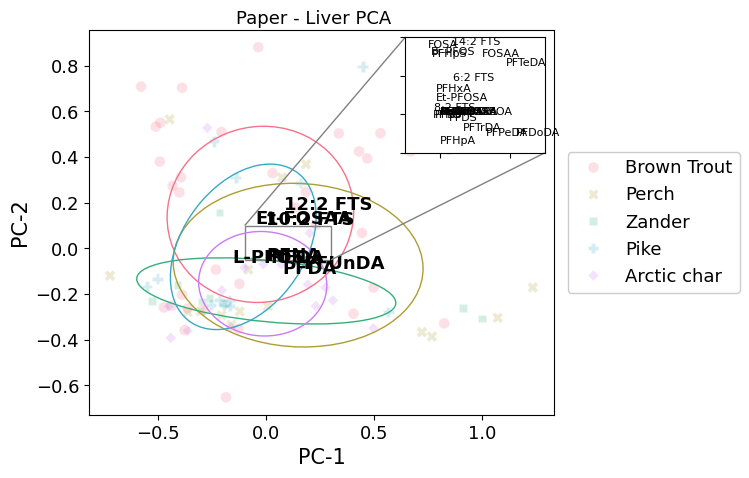

In [35]:
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
plt.close()
fig, ax1 = plt.subplots(figsize= (6,5))
plt.style.use('seaborn-bright')
plt.rcParams["font.family"] = "DejaVu Sans"

cL = sns.color_palette("husl", len(components['Species'].drop_duplicates()))
cL2 = cL.as_hex()
components =components.sort_values(by=['Source'])
# The data.
sns.scatterplot(data=components, x='PC-1', y = 'PC-2', hue='Species', style='Species', ax = ax1, s = 60, alpha= 0.21, palette=cL)
# The Einstein fit.
ax1.set_xlabel(r'PC-1', fontsize = 15)
ax1.set_ylabel(r'PC-2', fontsize = 15)
# ax1.set_xlim(-0.75, 1.01)
# ax1.set_ylim(-.65, 0.85)
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), framealpha = 1, frameon = True, fontsize = 13)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.68,0.68,0.3,0.3])
ax2.set_axes_locator(ip)
ax2.set_ylim(-0.05, 0.1)
ax2.set_xlim(-0.1, 0.3)
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
counterX = 0
counterY = 0
for i, feature in enumerate(final):
    if loadings[i,1] < 0:
        yloc = "top"
    else:
        yloc = "bottom"

    if (loadings[i,0] > -0.1) & (loadings[i,0] < 0.3) & (loadings[i,1] > -0.05) & (loadings[i,1] < 0.1):
        ax2.text(
            # --- Organized by other --- #
            # x=xlocs[counterX],
            # y=ylocs[counterY],
            # -- Orgainzed by actual location ---#
            x=loadings[i, 0],
            y=loadings[i, 1],

            s = feature,
            fontsize = 8
            )
        counterY = counterY + 1
        # if counterY > 11:
        #     counterX = counterX + 1
        #     counterY = 0
    else:
        ax1.text(
            x=loadings[i, 0],
            y=loadings[i, 1],
            s = feature,
            fontsize = 13,
            fontweight = 'bold',
            horizontalalignment = 'left'
            )

for s, c  in zip(list(components['Species'].drop_duplicates()), cL2):
    print(c)
    dummy = components[components['Species'] == s]
    if len(dummy['PC-1']) > 3:
        x = np.array(dummy['PC-1'])
        why = np.array(dummy['PC-2'])
        try:
            confidence_ellipse_matplot(x, why, ax1, edgecolor=c)
        except:
            pass

ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="both", labelbottom=False, labelleft = False)

plt.suptitle("Paper - Liver PCA", x = 0.5, y = 0.92, fontsize = 13)
plt.savefig('images\\FractionPCA_speciesPaper_liv.png', bbox_inches = 'tight', dpi =400)

Long range muscle.


In [36]:
lDf = pd. read_excel('LangbergData.xlsx')
lDf.columns = lDf.iloc[0]
cols = lDf.columns.to_list()
lDf = lDf.drop(0, axis = 0)
lDf = lDf.drop(lDf.columns[[0,1,4,5,7,9,10]], axis=1)
lDf = lDf.fillna(0)
lDf.loc[lDf['Species'] == 'Brown trout', 'Species'] = 'Brown Trout'

# NOTE: add line here to pair downt the chemical list
lDf.head()

# Delete all columns which do not have 0 values for entire DF
lDf = lDf.replace(to_replace='<', value=0, regex=True)
# Now select the AFFF data and only the muscle
AFFF = lDf[lDf['PFAS source'] == 'Long-range transport, rural']
AFFF = AFFF[AFFF['Tissue'] == 'Muscle']

X = AFFF[AFFF.columns.to_list()[4:len(AFFF.columns)]].to_numpy()
for i in list(range(len(X[:,0]))):
    X[i,:] = X[i,:]/np.sum(X[i,:])
X[(np.isinf(X)) | (np.isnan(X))] = 0
AFFF['PFAS source'] = pd.Categorical(AFFF['PFAS source'])
AFFF['Categories'] = AFFF['PFAS source'].cat.codes
y = AFFF['Categories'].to_numpy()
catList = list(AFFF['Categories'].drop_duplicates())
names = list(AFFF['PFAS source'].drop_duplicates())

scaler = MaxAbsScaler()
scaler.fit(X)
eX=scaler.transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(eX)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())
final = AFFF.columns.to_list()[4:len(AFFF.columns)-1]
print(len(loadings), len(final))
print(final)
components = pd.DataFrame(components, columns=["PC-1", "PC-2"])
components["Source"] = lDf['PFAS source'].str.strip()
components["Species"] = lDf['Species'].str.strip()
components = components[~components['Source'].isna()]

[0.40598814 0.16973521] 0.5757233500414498
38 38
['PFBA', 'PFPA', 'PFHxA', 'PFHpA', 'PFOA', 'PFNA', 'PFDA', 'PFUnDA', 'PFDoDA', 'PFTrDA', 'PFTeDA', 'PFPeDA', 'PFHxDA', 'PFBS', 'PFPeS', 'PFHxS', 'PFHpS', 'L-PFOS', 'Br-PFOS', 'PFNS', 'PFDS', 'PFDoS', 'FOSA', 'Me-PFOSA', 'Et-PFOSA', 'Me-PFOSE', 'Et-PFOSE', 'FOSAA', 'Me-FOSAA', 'Et-FOSAA', '4:2 FTS', '6:2 FTS', '8:2 FTS', '10:2 FTS', '12:2 FTS', '14:2 FTS', 'PF-3,7-DMOA', 'HPFHpA']


<ipython-input-37-494bcf09d9f9>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


#f77189
#ae9d31
#33b07a
#38a9c5
#cc7af4


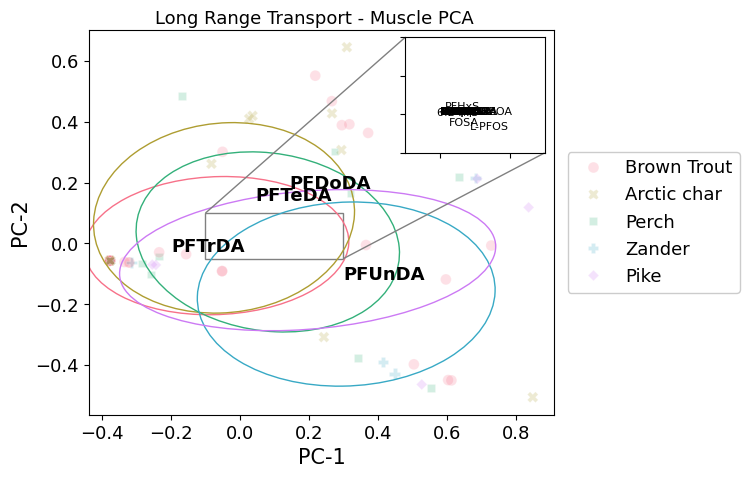

In [37]:
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
plt.close()
fig, ax1 = plt.subplots(figsize= (6,5))
plt.style.use('seaborn-bright')
plt.rcParams["font.family"] = "DejaVu Sans"

cL = sns.color_palette("husl", len(components['Species'].drop_duplicates()))
cL2 = cL.as_hex()
components =components.sort_values(by=['Source'])
# The data.
sns.scatterplot(data=components, x='PC-1', y = 'PC-2', hue='Species', style='Species', ax = ax1, s = 60, alpha= 0.21, palette=cL)
# The Einstein fit.
ax1.set_xlabel(r'PC-1', fontsize = 15)
ax1.set_ylabel(r'PC-2', fontsize = 15)
# ax1.set_xlim(-0.75, 1.01)
# ax1.set_ylim(-.65, 0.85)
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), framealpha = 1, frameon = True, fontsize = 13)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.68,0.68,0.3,0.3])
ax2.set_axes_locator(ip)
ax2.set_ylim(-0.05, 0.1)
ax2.set_xlim(-0.1, 0.3)
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
counterX = 0
counterY = 0
for i, feature in enumerate(final):
    if loadings[i,1] < 0:
        yloc = "top"
    else:
        yloc = "bottom"

    if (loadings[i,0] > -0.1) & (loadings[i,0] < 0.3) & (loadings[i,1] > -0.05) & (loadings[i,1] < 0.1):
        ax2.text(
            # --- Organized by other --- #
            # x=xlocs[counterX],
            # y=ylocs[counterY],
            # -- Orgainzed by actual location ---#
            x=loadings[i, 0],
            y=loadings[i, 1],

            s = feature,
            fontsize = 8
            )
        counterY = counterY + 1
        # if counterY > 11:
        #     counterX = counterX + 1
        #     counterY = 0
    else:
        ax1.text(
            x=loadings[i, 0],
            y=loadings[i, 1],
            s = feature,
            fontsize = 13,
            fontweight = 'bold',
            horizontalalignment = 'left'
            )

for s, c  in zip(list(components['Species'].drop_duplicates()), cL2):
    print(c)
    dummy = components[components['Species'] == s]
    if len(dummy['PC-1']) > 3:
        x = np.array(dummy['PC-1'])
        why = np.array(dummy['PC-2'])
        try:
            confidence_ellipse_matplot(x, why, ax1, edgecolor=c)
        except:
            pass

ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="both", labelbottom=False, labelleft = False)

plt.suptitle("Long Range Transport - Muscle PCA", x = 0.5, y = 0.92, fontsize = 13)
plt.savefig('images\\FractionPCA_speciesLongRange_mus.png', bbox_inches = 'tight', dpi =400)

Long range transport rural - Liver.

In [38]:
lDf = pd. read_excel('LangbergData.xlsx')
lDf.columns = lDf.iloc[0]
cols = lDf.columns.to_list()
lDf = lDf.drop(0, axis = 0)
lDf = lDf.drop(lDf.columns[[0,1,4,5,7,9,10]], axis=1)
lDf = lDf.fillna(0)
lDf.loc[lDf['Species'] == 'Brown trout', 'Species'] = 'Brown Trout'

# NOTE: add line here to pair downt the chemical list
lDf.head()

# Delete all columns which do not have 0 values for entire DF
lDf = lDf.replace(to_replace='<', value=0, regex=True)
# Now select the AFFF data and only the muscle
AFFF = lDf[lDf['PFAS source'] == 'Long-range transport, rural']
AFFF = AFFF[AFFF['Tissue'] == 'Liver']

X = AFFF[AFFF.columns.to_list()[4:len(AFFF.columns)]].to_numpy()
for i in list(range(len(X[:,0]))):
    X[i,:] = X[i,:]/np.sum(X[i,:])
X[(np.isinf(X)) | (np.isnan(X))] = 0
AFFF['PFAS source'] = pd.Categorical(AFFF['PFAS source'])
AFFF['Categories'] = AFFF['PFAS source'].cat.codes
y = AFFF['Categories'].to_numpy()
catList = list(AFFF['Categories'].drop_duplicates())
names = list(AFFF['PFAS source'].drop_duplicates())

scaler = MaxAbsScaler()
scaler.fit(X)
eX=scaler.transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(eX)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum())
final = AFFF.columns.to_list()[4:len(AFFF.columns)-1]
print(len(loadings), len(final))
print(final)
components = pd.DataFrame(components, columns=["PC-1", "PC-2"])
components["Source"] = lDf['PFAS source'].str.strip()
components["Species"] = lDf['Species'].str.strip()
components = components[~components['Source'].isna()]

[0.2214369 0.1925583] 0.4139951975194762
38 38
['PFBA', 'PFPA', 'PFHxA', 'PFHpA', 'PFOA', 'PFNA', 'PFDA', 'PFUnDA', 'PFDoDA', 'PFTrDA', 'PFTeDA', 'PFPeDA', 'PFHxDA', 'PFBS', 'PFPeS', 'PFHxS', 'PFHpS', 'L-PFOS', 'Br-PFOS', 'PFNS', 'PFDS', 'PFDoS', 'FOSA', 'Me-PFOSA', 'Et-PFOSA', 'Me-PFOSE', 'Et-PFOSE', 'FOSAA', 'Me-FOSAA', 'Et-FOSAA', '4:2 FTS', '6:2 FTS', '8:2 FTS', '10:2 FTS', '12:2 FTS', '14:2 FTS', 'PF-3,7-DMOA', 'HPFHpA']


<ipython-input-40-ece45603336a>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


#f77189
#ce9032
#97a431
#32b166
#36ada4
#39a7d0
#a48cf4
#f561dd


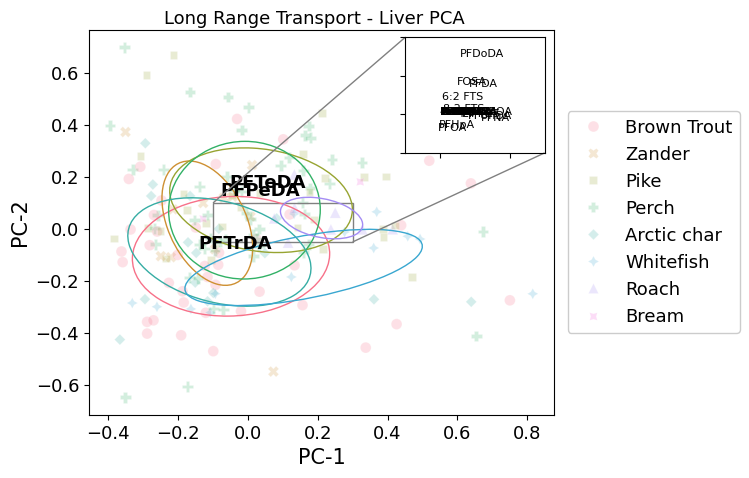

In [40]:
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
plt.close()
fig, ax1 = plt.subplots(figsize= (6,5))
plt.style.use('seaborn-bright')
plt.rcParams["font.family"] = "DejaVu Sans"

cL = sns.color_palette("husl", len(components['Species'].drop_duplicates()))
cL2 = cL.as_hex()
components =components.sort_values(by=['Source'])
# The data.
sns.scatterplot(data=components, x='PC-1', y = 'PC-2', hue='Species', style='Species', ax = ax1, s = 60, alpha= 0.21, palette=cL)
# The Einstein fit.
ax1.set_xlabel(r'PC-1', fontsize = 15)
ax1.set_ylabel(r'PC-2', fontsize = 15)
# ax1.set_xlim(-0.75, 1.01)
# ax1.set_ylim(-.65, 0.85)
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), framealpha = 1, frameon = True, fontsize = 13)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.68,0.68,0.3,0.3])
ax2.set_axes_locator(ip)
ax2.set_ylim(-0.05, 0.1)
ax2.set_xlim(-0.1, 0.3)
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
counterX = 0
counterY = 0
for i, feature in enumerate(final):
    if loadings[i,1] < 0:
        yloc = "top"
    else:
        yloc = "bottom"

    if (loadings[i,0] > -0.1) & (loadings[i,0] < 0.3) & (loadings[i,1] > -0.05) & (loadings[i,1] < 0.1):
        ax2.text(
            # --- Organized by other --- #
            # x=xlocs[counterX],
            # y=ylocs[counterY],
            # -- Orgainzed by actual location ---#
            x=loadings[i, 0],
            y=loadings[i, 1],

            s = feature,
            fontsize = 8
            )
        counterY = counterY + 1
        # if counterY > 11:
        #     counterX = counterX + 1
        #     counterY = 0
    else:
        ax1.text(
            x=loadings[i, 0],
            y=loadings[i, 1],
            s = feature,
            fontsize = 13,
            fontweight = 'bold',
            horizontalalignment = 'left'
            )

for s, c  in zip(list(components['Species'].drop_duplicates()), cL2):
    print(c)
    dummy = components[components['Species'] == s]
    if len(dummy['PC-1']) > 3:
        x = np.array(dummy['PC-1'])
        why = np.array(dummy['PC-2'])
        try:
            confidence_ellipse_matplot(x, why, ax1, edgecolor=c)
        except:
            pass

ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="both", labelbottom=False, labelleft = False)

plt.suptitle("Long Range Transport - Liver PCA", x = 0.5, y = 0.92, fontsize = 13)
plt.savefig('images\\FractionPCA_speciesLongRange_liv.png', bbox_inches = 'tight', dpi =400)